# KNeighborsClassifier

In [82]:
from sklearn.neighbors import KNeighborsClassifier
import os
import subprocess

import pandas as pd
import numpy as np
import graphviz
from sklearn.tree import export_graphviz

#Incarcare dataset
input_file = "data_banknote_authentication.txt"
data = pd.read_csv(input_file, header = 0)

array = data.values
X = array[:,0:4]
Y = array[:,4]
data

,WaveletVar,WaveletSkew,WaveletKurt,ImgEntropy,Authenticity
0,4.54590,8.1674,-2.45860,-1.46210,0
1,3.86600,-2.6383,1.92420,0.10645,0
2,3.45660,9.5228,-4.01120,-3.59440,0
3,0.32924,-4.4552,4.57180,-0.98880,0
4,4.36840,9.6718,-3.96060,-3.16250,0
...,...,...,...,...,...
1365,-2.41000,3.7433,-0.40215,-1.29530,1
1366,0.40614,1.3492,-1.45010,-0.55949,1
1367,-1.38870,-4.8773,6.47740,0.34179,1
1368,-3.75030,-13.4586,17.59320,-2.77710,1


In [83]:
#Primele 5 inregistrari
data.head()

,WaveletVar,WaveletSkew,WaveletKurt,ImgEntropy,Authenticity
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [84]:
#Impartire dataset: train + test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
print(X_train.shape)
print(X_test.shape)

(959, 4)
(411, 4)


In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)
X_test

(959, 4)
(411, 4)


array([[-0.00884117, -1.10023621,  0.72794232,  0.12768554],
       [-0.6103791 , -0.57925601,  0.20128871,  0.57611433],
       [-0.34947134, -1.12580185,  1.60524132, -0.67025042],
       ...,
       [-1.85339661,  0.21287228, -0.08744937, -0.08335417],
       [-0.08086904,  1.17527447, -0.55177738, -0.54196683],
       [ 1.38219124,  1.0435522 , -0.98106177, -0.07853253]])

In [86]:
#Fit + Predict
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Y_prediction = model.predict(X_test)

print("Y: ",Y)
print("Y_prediction:",Y_prediction)
print("Y_test:",Y_test)

Y:  [0. 0. 0. ... 1. 1. 1.]
Y_prediction: [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1.

In [101]:
#Testare estimator pe 2 exemple concrete
#prima inregistrare ar trebui sa aiba valoarea 0, a doua valoarea 1
my_test= [[3.6216,8.6661,-2.8073,-0.44699],[-2.5419,-0.65804,2.6842,1.1952]]
Y_prediction_test= model.predict(my_test)
print("Prediction form my given test:",Y_prediction_test)

Prediction form my given test: [0. 1.]


In [87]:
#5 metrici pentru clasificatorul initial
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))

confusion_mat = confusion_matrix(Y_test, Y_prediction)
print("Confusion matrix is : ", confusion_mat)

recall_show = recall_score(Y_test, Y_prediction) 
print("Recall_score is :",recall_show)

precision_show = precision_score(Y_test, Y_prediction) 
print("Precision Score is : ", precision_show)

f1_score=f1_score(Y_test, Y_prediction)
print("f1 Score is : ",f1_score)

Accuracy: 1.0
Confusion matrix is :  [[220   0]
 [  0 191]]
Recall_score is : 1.0
Precision Score is :  1.0
f1 Score is :  1.0


In [88]:
#Cross-validation-evaluare scor
from sklearn.model_selection import cross_val_score
cross_val_score(model, X,Y,cv=5)  

array([1., 1., 1., 1., 1.])

In [89]:
#GridSearch pentru imbunatatire rezultate-cautarea celor mai bune valori pentru parametri
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':range(5,17),'weights':('uniform', 'distance') ,'algorithm':('auto','ball_tree','kd_tree','brute')}
model2 = KNeighborsClassifier()
clf = GridSearchCV(model2, parameters)
clf.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': range(5, 17),
                         'weights': ('uniform', 'distance')})

In [90]:
clf.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}

In [91]:
from sklearn.metrics import f1_score
#Schimbare parametrii pentru a imbunatati performanta
#Valorile pentru parametrii sunt cei gasiti de GridSearch

clf.fit(X_train,Y_train)
Y_prediction = clf.predict(X_test)
print("Y: ",Y)
print("Y_prediction:",Y_prediction)
print("Y_test:",Y_test)
print("Metricile dupa setarea parametrilor optimi:")
print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))

confusion_mat = confusion_matrix(Y_test, Y_prediction)
print("Confusion matrix is : ", confusion_mat)

recall_show = recall_score(Y_test, Y_prediction) 
print("Recall_score is :",recall_show)

precision_show = precision_score(Y_test, Y_prediction) 
print("Precision Score is : ", precision_show)

f1_score = f1_score(Y_test, Y_prediction)
print("f1 Score is : ",f1_score)

Y:  [0. 0. 0. ... 1. 1. 1.]
Y_prediction: [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1.

In [92]:
#Cross-validation pentru modelul cu parametrii gasiti de GridSearch
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X,Y,cv=2)

array([1., 1.])

# Vizualizare rezultate obtinute cu parametri diferiti

In [93]:
#Vizualizare rezultate obtinute cu parametri diferiti
range_k = range(1,30)
scores = {}
scores_list = []

for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, Y_train)
   Y_prediction = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(Y_test,Y_prediction)
   scores_list.append(metrics.accuracy_score(Y_test,Y_prediction))


Text(0, 0.5, 'Accuracy')

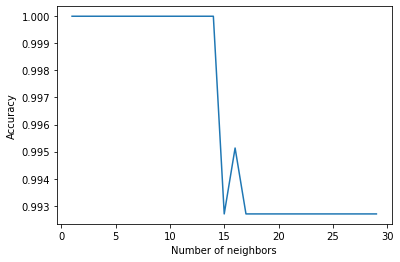

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range_k,scores_list)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")


In [95]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, Y_train)
Y_prediction = classifier.predict(X_test)
print(Y_prediction)
print(Y_test)

result = metrics.confusion_matrix(Y_test, Y_prediction)
print("Confusion Matrix:")
print(result)

result1 = metrics.classification_report(Y_test, Y_prediction)
print("Classification Report:",)
print (result1)

[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.

# RadiusNeighborsClassifier

In [96]:
#Incarcare dataset
from sklearn.neighbors import RadiusNeighborsClassifier

input_file = "data_banknote_authentication.txt"
data = pd.read_csv(input_file, header = 0)

array = data.values
X = array[:,0:4]
Y = array[:,4]

In [97]:
#Impartire dataset: train + test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
#Fit + Predict
rnc = RadiusNeighborsClassifier()
rnc.fit(X_train, Y_train)
Y_prediction = rnc.predict(X_test)

print("Y: ",Y)
print("Y_prediction:",Y_prediction)
print("Y_test:",Y_test)

Y:  [0. 0. 0. ... 1. 1. 1.]
Y_prediction: [0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1.

In [100]:
#5 metrici pentru clasificatorul Rneighbors cu parametri default
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction))

confusion_mat = confusion_matrix(Y_test, Y_prediction)
print("Confusion matrix is : ", confusion_mat)

recall_show = recall_score(Y_test, Y_prediction) 
print("Recall_score is :",recall_show)

precision_show = precision_score(Y_test, Y_prediction) 
print("Precision Score is : ", precision_show)

f1_score=f1_score(Y_test, Y_prediction)
print("f1 Score is : ",f1_score)

Accuracy: 0.9927007299270073
Confusion matrix is :  [[226   3]
 [  0 182]]
Recall_score is : 1.0
Precision Score is :  0.9837837837837838
f1 Score is :  0.9918256130790191


# Eliminarea celor mai putin semnificative 2 features

In [112]:
x = data[data.columns.drop(['Authenticity','ImgEntropy','WaveletKurt'])]
y = data['Authenticity']
x

,WaveletVar,WaveletSkew
0,4.54590,8.1674
1,3.86600,-2.6383
2,3.45660,9.5228
3,0.32924,-4.4552
4,4.36840,9.6718
...,...,...
1365,-2.41000,3.7433
1366,0.40614,1.3492
1367,-1.38870,-4.8773
1368,-3.75030,-13.4586


Text(0, 0.5, 'Accuracy after elimination features')

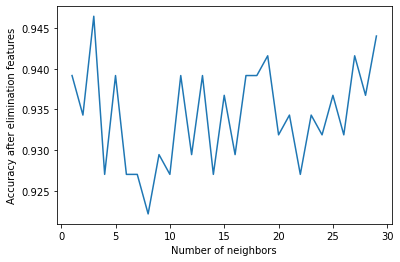

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.30)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#Vizualizare rezultate obtinute cu parametri diferiti
range_k = range(1,30)
scores = {}
scores_list = []

for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, Y_train)
   Y_prediction = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(Y_test,Y_prediction)
   scores_list.append(metrics.accuracy_score(Y_test,Y_prediction))
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range_k,scores_list)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy after elimination features")
